In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

# EDA

In [4]:
df = pd.read_csv("../data/SpotifyAudioFeaturesApril2019.csv")
df.columns = df.columns.str.lower()
df.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       130663 non-null  object 
 1   track_id          130663 non-null  object 
 2   track_name        130662 non-null  object 
 3   acousticness      130663 non-null  float64
 4   danceability      130663 non-null  float64
 5   duration_ms       130663 non-null  int64  
 6   energy            130663 non-null  float64
 7   instrumentalness  130663 non-null  float64
 8   key               130663 non-null  int64  
 9   liveness          130663 non-null  float64
 10  loudness          130663 non-null  float64
 11  mode              130663 non-null  int64  
 12  speechiness       130663 non-null  float64
 13  tempo             130663 non-null  float64
 14  time_signature    130663 non-null  int64  
 15  valence           130663 non-null  float64
 16  popularity        13

In [6]:
numeric_cols = list(df.columns[df.dtypes != 'object'])
string_cols = list(df.columns[df.dtypes == 'object'])

print(numeric_cols)
print(string_cols)

['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']
['artist_name', 'track_id', 'track_name']


In [7]:
df.isnull().sum()

artist_name         0
track_id            0
track_name          1
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64

hit
0    128643
1      2020
Name: count, dtype: int64


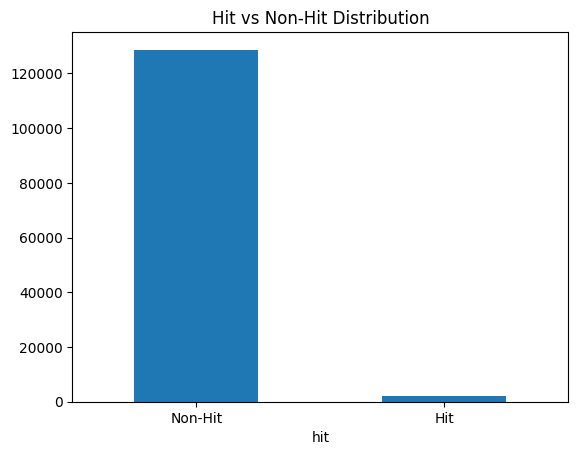

hit
0    0.98454
1    0.01546
Name: proportion, dtype: float64

In [8]:
df["hit"] = (df["popularity"] >= 70).astype(int)
print(df["hit"].value_counts())
df["hit"].value_counts().plot(
    kind="bar",
    title="Hit vs Non-Hit Distribution"
)
plt.xticks([0, 1], ["Non-Hit", "Hit"], rotation=0)
plt.show()

df["hit"].value_counts(normalize=True)

# Data Cleaning / Preprocessing

In [9]:
# drop some unnecessary data
cols_to_drop = [
    "track_id",
    "track_name",
    "artist_name",
    "album_name",
    "popularity"
]

df = df.drop(columns=cols_to_drop, errors="ignore")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      130663 non-null  float64
 1   danceability      130663 non-null  float64
 2   duration_ms       130663 non-null  int64  
 3   energy            130663 non-null  float64
 4   instrumentalness  130663 non-null  float64
 5   key               130663 non-null  int64  
 6   liveness          130663 non-null  float64
 7   loudness          130663 non-null  float64
 8   mode              130663 non-null  int64  
 9   speechiness       130663 non-null  float64
 10  tempo             130663 non-null  float64
 11  time_signature    130663 non-null  int64  
 12  valence           130663 non-null  float64
 13  hit               130663 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 14.0 MB


# the validation framework

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_full_train, df_test = train_test_split(df, test_size=0.2, stratify=df["hit"], random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, stratify=df_full_train["hit"], random_state=1)
len(df_train), len(df_val), len(df_test)

(78397, 26133, 26133)

In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
y_train = df_train.hit.values
y_val = df_val.hit.values
y_test = df_test.hit.values

In [14]:
features = [c for c in df_train.columns if c != "hit"]

X_train = df_train[features]
X_val = df_val[features]
X_test = df_test[features]

# Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report


lr = LogisticRegression(max_iter=2000, random_state=1)

lr.fit(X_train_scaled, y_train)
val_pred = lr.predict(X_val_scaled)

print("Val Accuracy:", accuracy_score(y_val, val_pred))
print("Val F1:", f1_score(y_val, val_pred))
print("Val Precision:", precision_score(y_val, val_pred, zero_division=0))
print("Val Recall:", recall_score(y_val, val_pred, zero_division=0))
print(classification_report(y_val, val_pred, digits=4))

Val Accuracy: 0.9845406191405502
Val F1: 0.0
Val Precision: 0.0
Val Recall: 0.0
              precision    recall  f1-score   support

           0     0.9845    1.0000    0.9922     25729
           1     0.0000    0.0000    0.0000       404

    accuracy                         0.9845     26133
   macro avg     0.4923    0.5000    0.4961     26133
weighted avg     0.9693    0.9845    0.9769     26133



/Users/prograsshopper/projects/hit-song-classification/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/prograsshopper/projects/hit-song-classification/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/prograsshopper/projects/hit-song-classification/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` 

In [17]:
C_list = [0.01, 0.1, 1, 10, 100]
rows = []

for C in C_list:
    lr = LogisticRegression(max_iter=2000, random_state=1, C=C)
    lr.fit(X_train_scaled, y_train)
    pred = lr.predict(X_val_scaled)

    rows.append({
        "C": C,
        "f1": f1_score(y_val, pred),
        "precision": precision_score(y_val, pred, zero_division=0),
        "recall": recall_score(y_val, pred, zero_division=0),
        "accuracy": accuracy_score(y_val, pred),
    })

results = pd.DataFrame(rows).sort_values("f1", ascending=False)
print(results)

        C   f1  precision  recall  accuracy
0    0.01  0.0        0.0     0.0  0.984541
1    0.10  0.0        0.0     0.0  0.984541
2    1.00  0.0        0.0     0.0  0.984541
3   10.00  0.0        0.0     0.0  0.984541
4  100.00  0.0        0.0     0.0  0.984541


In [18]:
best_C = results.iloc[0].C

best_lr = LogisticRegression(
    max_iter=2000,
    random_state=1,
    C=best_C
)

best_lr.fit(X_train_scaled, y_train)

test_pred = best_lr.predict(X_test_scaled)
print("Test F1:", f1_score(y_test, test_pred))
print(classification_report(y_test, test_pred, digits=4))

Test F1: 0.0
              precision    recall  f1-score   support

           0     0.9845    1.0000    0.9922     25729
           1     0.0000    0.0000    0.0000       404

    accuracy                         0.9845     26133
   macro avg     0.4923    0.5000    0.4961     26133
weighted avg     0.9693    0.9845    0.9769     26133



/Users/prograsshopper/projects/hit-song-classification/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/prograsshopper/projects/hit-song-classification/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/prograsshopper/projects/hit-song-classification/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` 

# RandomForest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=1,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)
val_pred = rf.predict(X_val_scaled)

print("Val Accuracy:", accuracy_score(y_val, val_pred))
print("Val F1:", f1_score(y_val, val_pred))
print("Val Precision:", precision_score(y_val, val_pred, zero_division=0))
print("Val Recall:", recall_score(y_val, val_pred, zero_division=0))
print(classification_report(y_val, val_pred, digits=4))

Val Accuracy: 0.9846554165231699
Val F1: 0.029055690072639227
Val Precision: 0.6666666666666666
Val Recall: 0.01485148514851485
              precision    recall  f1-score   support

           0     0.9848    0.9999    0.9923     25729
           1     0.6667    0.0149    0.0291       404

    accuracy                         0.9847     26133
   macro avg     0.8257    0.5074    0.5107     26133
weighted avg     0.9798    0.9847    0.9774     26133



In [20]:
grid_n_estimators = [200, 500]
grid_max_depth = [None, 10, 20]
grid_min_samples_leaf = [1, 3]
grid_class_weight = [None, "balanced"]

rows = []

for n_estimators in grid_n_estimators:
    for max_depth in grid_max_depth:
        for min_leaf in grid_min_samples_leaf:
            for cw in grid_class_weight:
                rf = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_leaf=min_leaf,
                    class_weight=cw,
                    random_state=1,
                    n_jobs=-1
                )
                rf.fit(X_train_scaled, y_train)
                pred = rf.predict(X_val_scaled)

                rows.append({
                    "n_estimators": n_estimators,
                    "max_depth": max_depth,
                    "min_samples_leaf": min_leaf,
                    "class_weight": cw,
                    "f1": f1_score(y_val, pred),
                    "precision": precision_score(y_val, pred, zero_division=0),
                    "recall": recall_score(y_val, pred, zero_division=0),
                    "accuracy": accuracy_score(y_val, pred),
                })

tune_table = pd.DataFrame(rows).sort_values("f1", ascending=False)
tune_table.head(15)

,n_estimators,max_depth,min_samples_leaf,class_weight,f1,precision,recall,accuracy
21,500,20.0,1,balanced,0.122399,0.081301,0.247525,0.945127
9,200,20.0,1,balanced,0.118227,0.078689,0.237624,0.945203
23,500,20.0,3,balanced,0.115713,0.076737,0.235149,0.944438
11,200,20.0,3,balanced,0.115099,0.076733,0.230198,0.945280
7,200,10.0,3,balanced,0.086534,0.046192,0.683168,0.777025
5,200,10.0,1,balanced,0.084661,0.045182,0.670792,0.775762
19,500,10.0,3,balanced,0.084349,0.045015,0.668317,0.775686
17,500,10.0,1,balanced,0.083656,0.044621,0.668317,0.773658
15,500,NaN,3,balanced,0.029126,0.750000,0.014851,0.984694
13,500,NaN,1,balanced,0.029126,0.750000,0.014851,0.984694


In [21]:
best = tune_table.iloc[0].to_dict()
best_rf = RandomForestClassifier(
    n_estimators=int(best["n_estimators"]),
    max_depth=None if pd.isna(best["max_depth"]) else int(best["max_depth"]),
    min_samples_leaf=int(best["min_samples_leaf"]),
    class_weight=best["class_weight"] if best["class_weight"] == "balanced" else None,
    random_state=1,
    n_jobs=-1
)

best_rf.fit(X_train_scaled, y_train)

test_pred = best_rf.predict(X_test_scaled)
print("Test F1:", f1_score(y_test, test_pred))
print(classification_report(y_test, test_pred, digits=4))

Test F1: 0.11124401913875598
              precision    recall  f1-score   support

           0     0.9875    0.9543    0.9706     25729
           1     0.0733    0.2302    0.1112       404

    accuracy                         0.9431     26133
   macro avg     0.5304    0.5923    0.5409     26133
weighted avg     0.9734    0.9431    0.9573     26133



# GradientBoost

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

gb = GradientBoostingClassifier(
    random_state=1
)

gb.fit(X_train_scaled, y_train)
val_pred = gb.predict(X_val_scaled)

print("Val Accuracy:", accuracy_score(y_val, val_pred))
print("Val F1:", f1_score(y_val, val_pred))
print("Val Precision:", precision_score(y_val, val_pred, zero_division=0))
print("Val Recall:", recall_score(y_val, val_pred))
print(classification_report(y_val, val_pred, digits=4))

Val Accuracy: 0.9841196954042781
Val F1: 0.0
Val Precision: 0.0
Val Recall: 0.0
              precision    recall  f1-score   support

           0     0.9845    0.9996    0.9920     25729
           1     0.0000    0.0000    0.0000       404

    accuracy                         0.9841     26133
   macro avg     0.4923    0.4998    0.4960     26133
weighted avg     0.9693    0.9841    0.9767     26133



In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

grid_n_estimators = [100, 200, 300]
grid_learning_rate = [0.05, 0.1, 0.2]
grid_subsample = [1.0, 0.8]  # stochastic boosting

rows = []

for n_estimators in grid_n_estimators:
    for lr in grid_learning_rate:
        for subsample in grid_subsample:
            gb = GradientBoostingClassifier(
                n_estimators=n_estimators,
                learning_rate=lr,
                subsample=subsample,
                random_state=1
            )
            gb.fit(X_train_scaled, y_train)
            pred = gb.predict(X_val_scaled)

            rows.append({
                "n_estimators": n_estimators,
                "learning_rate": lr,
                "subsample": subsample,
                "f1": f1_score(y_val, pred),
                "precision": precision_score(y_val, pred, zero_division=0),
                "recall": recall_score(y_val, pred),
                "accuracy": accuracy_score(y_val, pred),
            })

tune_table = pd.DataFrame(rows).sort_values("f1", ascending=False)
tune_table.head(15)

In [ ]:
best = tune_table.iloc[0].to_dict()
best_gb = GradientBoostingClassifier(
    n_estimators=int(best["n_estimators"]),
    learning_rate=float(best["learning_rate"]),
    subsample=float(best["subsample"]),
    random_state=1
)

best_gb.fit(X_train_scaled, y_train)

test_pred = best_gb.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, test_pred))
print("Test F1:", f1_score(y_test, test_pred))
print(classification_report(y_test, test_pred, digits=4))